In [1]:
from helpers import *
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
s3 = s3_connection()
df = s3.get_tables_from_s3("aayrapetyan/diffusion/final_table.parquet")
df.sample(3)

connection successful


,total_voyageurs_2022,nom_gare,uic,codeinsee,lon_gare,lat_gare,codecommune,nomcommune,pop2022,revmoy2022,...,psup2022,pagri2022,pindp2022,pcadr2022,ppint2022,pempl2022,pouvr2022,pchom2022,dist_closest_station_km,regions
1681,68497,Vervins,87296129,02789,3.893631,49.829924,02789,VERVINS,2392.0,14051.326,...,0.205514,0.000000,0.025516,0.065614,0.260024,0.341434,0.307412,0.140948,7.130079,Hauts-de-France
1616,3035,Saint-Pierre-de-Chignac,87595520,24484,0.856103,45.123488,24484,SAINT-PIERRE-DE-CHIGNAC,921.0,17046.246,...,0.128613,0.149660,0.102041,0.054422,0.350340,0.173469,0.170068,0.115646,3.861407,Nouvelle-Aquitaine
424,10766,Saint-Florent-sur-Cher,87576272,18207,2.252567,46.992187,18207,ST-FLORENT-SUR-CHER,6661.0,15754.998,...,0.200977,0.020812,0.090010,0.084807,0.121748,0.316337,0.366285,0.031738,6.563780,Centre-Val de Loire


In [3]:
aggregated_stats = calculate(
    df,
    group=["regions"],
    fields_stats_names=[
        ["total_voyageurs_2022", "sum"],
        ["pop2022", "sum"],
        ["revmoy2022", "mean"],
        ["pbac2022", "mean"],
        ["pagri2022", "mean"],
        ["pindp2022", "mean"],
        ["pcadr2022", "mean"],
        ["pempl2022", "mean"],
        ["pouvr2022", "mean"],
        ["pchom2022", "mean"],
        
    ],
)
df_for_map = df.merge(aggregated_stats, on="regions", how="inner")

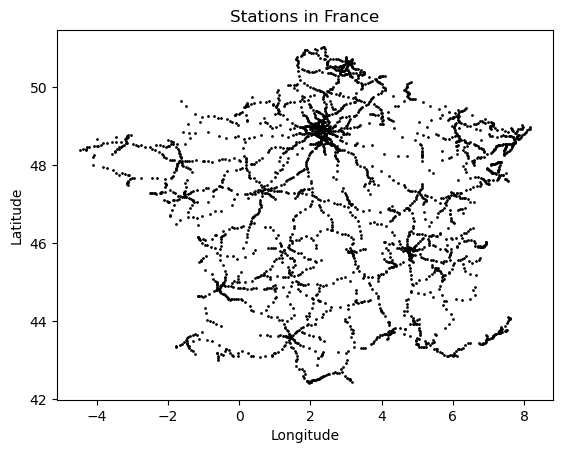

In [4]:
simple_plot_map(lat=df["lat_gare"], lon=df["lon_gare"])

nb removed observations :  18


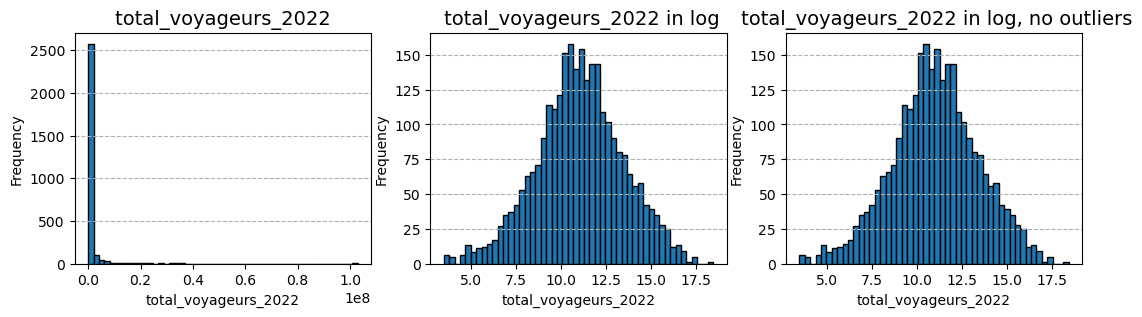

In [5]:
fig, axs = plt.subplots(1, 3, figsize=(13, 3))  # 3 rows, 1 column of plots
df = delete_outliers_z_score(df, np.log(df["total_voyageurs_2022"]))
df["total_voyageurs_2022_log"] =  np.log(df["total_voyageurs_2022"])
df["pop2022_log"] =  np.log(df["pop2022"])
df["pagri2022_log"] =  np.log(df["pagri2022"]+0.0001)
plot_hist(axs[0], df["total_voyageurs_2022"], title_suffix="")
plot_hist(axs[1], np.log(df["total_voyageurs_2022"]), title_suffix="in log")
plot_hist(
    axs[2],
    np.log(df["total_voyageurs_2022"]),
    title_suffix="in log, no outliers",
)

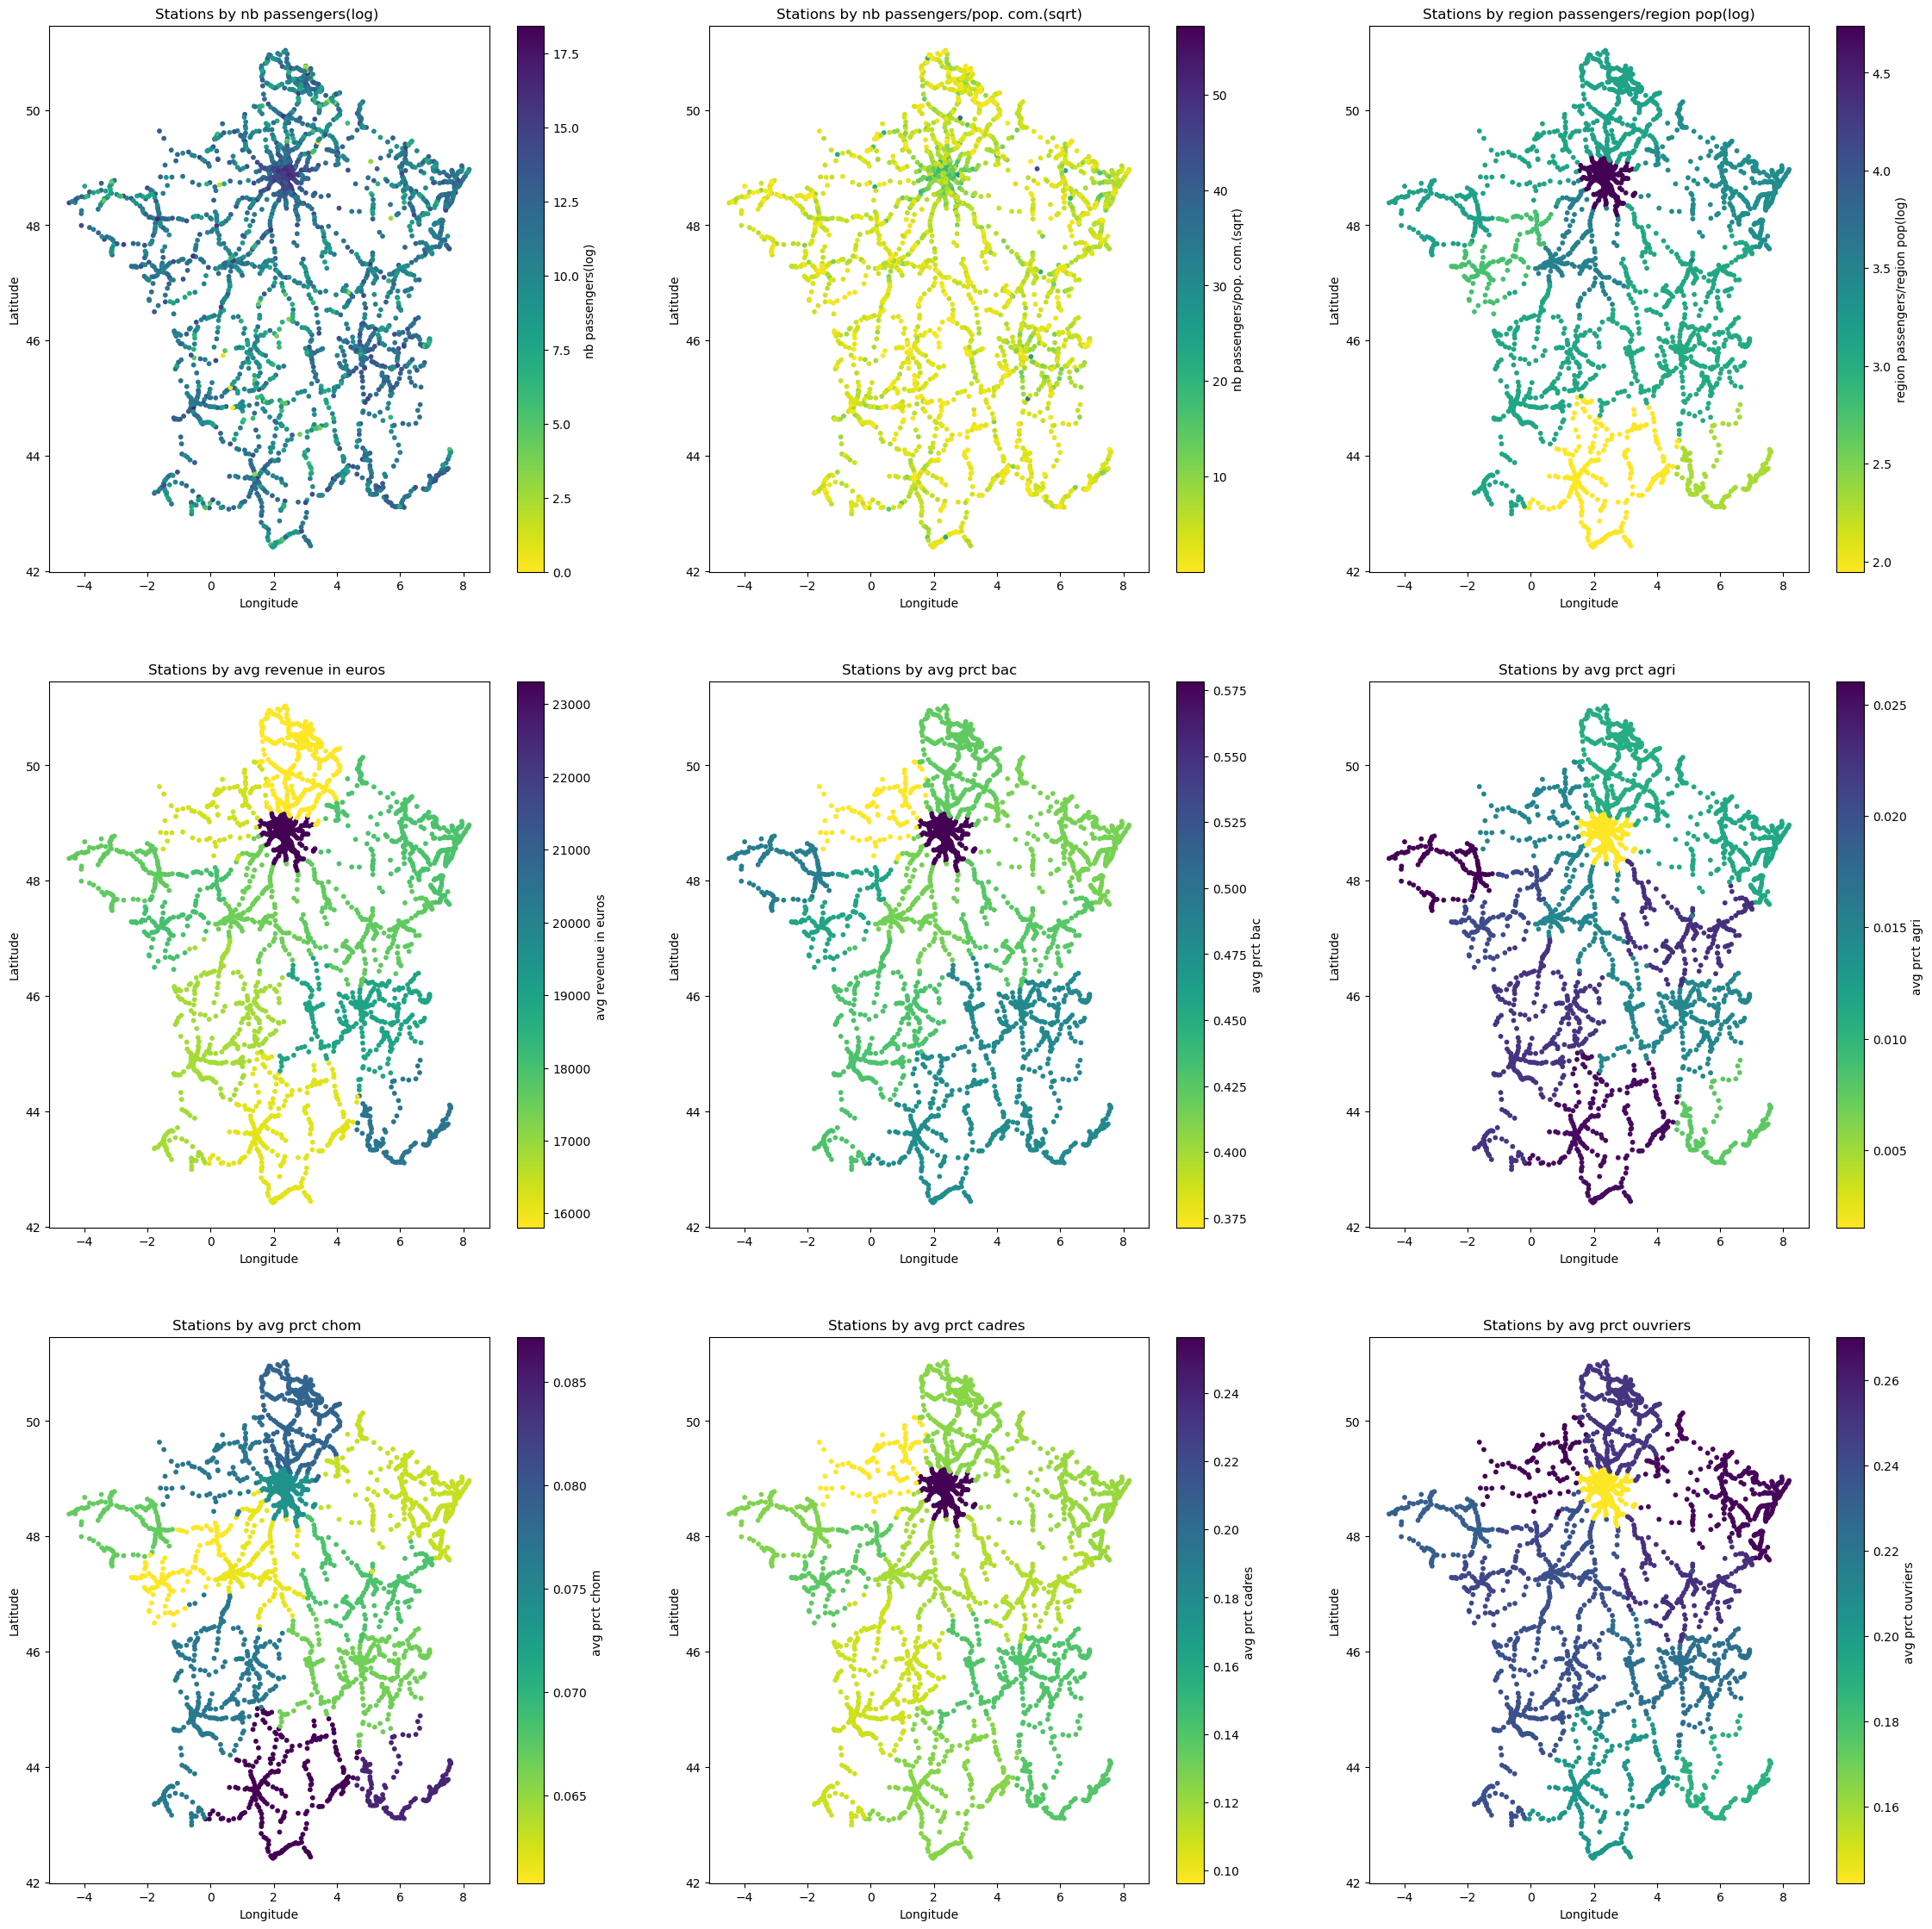

In [6]:
plot_square_map(lon=df_for_map["lon_gare"],lat=df_for_map["lat_gare"],
    fields_names=[
        [np.log(df_for_map["total_voyageurs_2022"]), "nb passengers(log) "],
        [
            np.sqrt(
                df_for_map["total_voyageurs_2022"] / df_for_map["pop2022"]
            ),
            "nb passengers/pop. com.(sqrt)",
        ],
        [
            np.log(
                df_for_map["total_voyageurs_2022_sum"]
                / df_for_map["pop2022_sum"]
            ),
            "region passengers/region pop(log)",
        ],
        [
            (df_for_map["revmoy2022_mean"]),
            "avg revenue in euros ",
        ],
        [
            df_for_map["pbac2022_mean"],
            "avg prct bac",
        ],
        [
            df_for_map["pagri2022_mean"],
            "avg prct agri ",
        ],
        [
            (df_for_map["pchom2022_mean"]),
            "avg prct chom ",
        ],
        [
            df_for_map["pcadr2022_mean"],
            "avg prct cadres ",
        ],
        [
            df_for_map["pouvr2022_mean"],
            "avg prct ouvriers ",
        ],
    ]
)

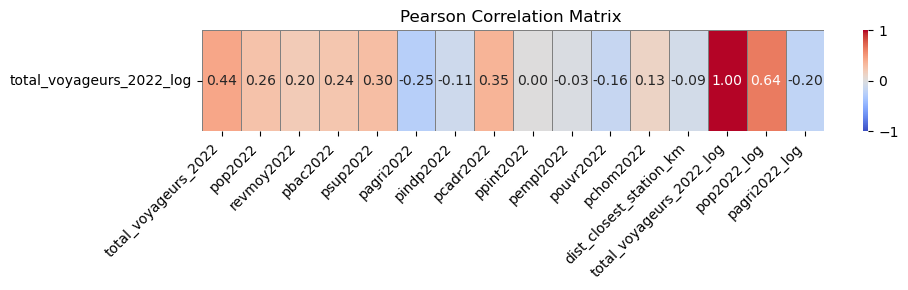

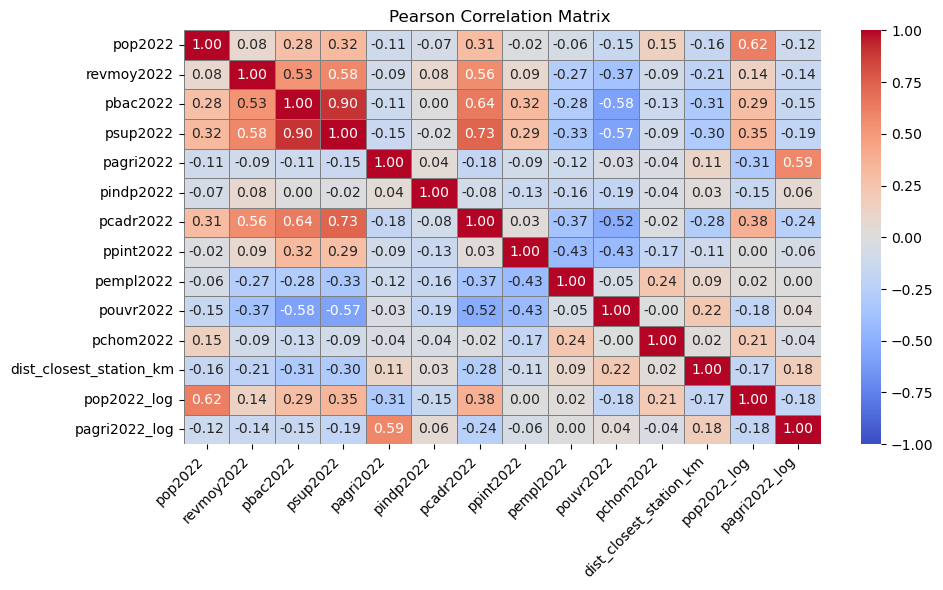

In [7]:
corr_matrix(df,filter_include=["total_voyageurs_2022_log"],filter_exclude=["lon_gare","lat_gare"],figsize=(10,3))
corr_matrix(df,filter_exclude=["total_voyageurs_2022_log","total_voyageurs_2022","lon_gare","lat_gare"])



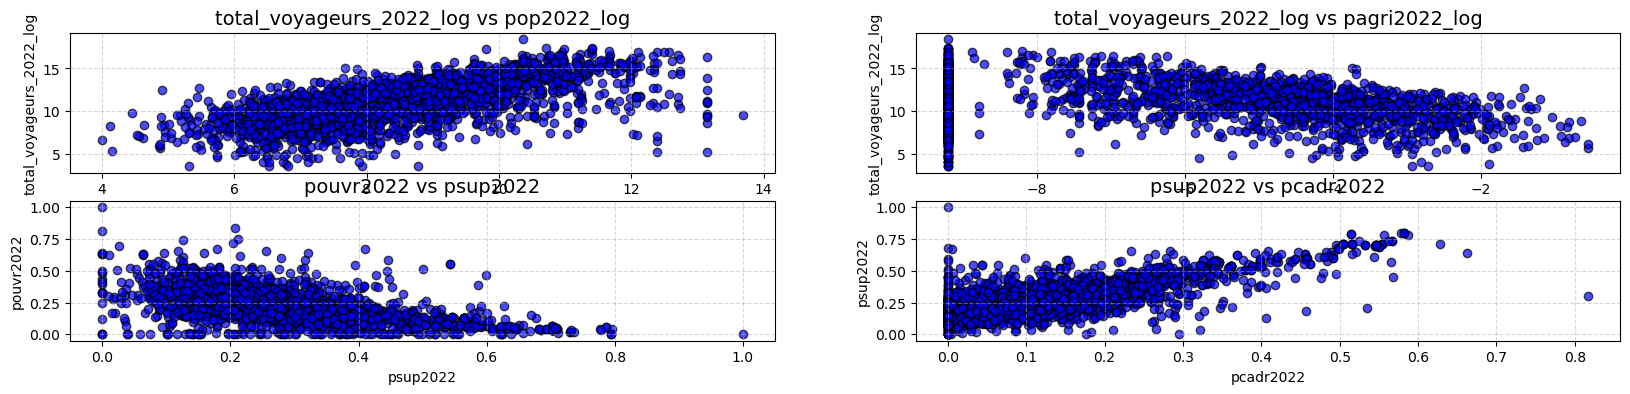

In [8]:
fig, axs = plt.subplots(2, 2, figsize=(20, 4))  # Adjust figsize as needed

plot_scatter(
    ax=axs[0,0],
    x_series=(df['pop2022_log']),
    y_series=df['total_voyageurs_2022_log'],
    
    
)

plot_scatter(
    ax=axs[0,1],
    x_series=(df['pagri2022_log']),
    y_series=df['total_voyageurs_2022_log'],
    

)
plot_scatter(
    ax=axs[1,0],
    x_series=(df['psup2022']),
    y_series=df['pouvr2022'],  

)
plot_scatter(
    ax=axs[1,1],
    x_series=(df['pcadr2022']),
    y_series=df['psup2022'],  

)




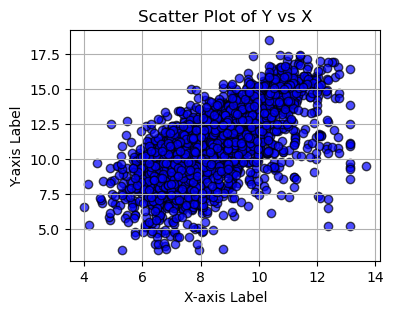

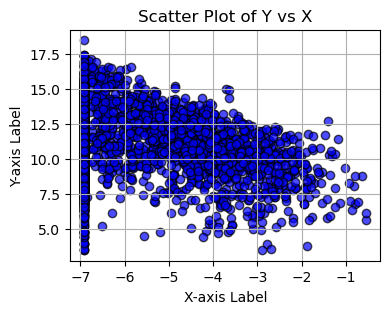

In [94]:

plt.figure(figsize=(4, 3))
plt.scatter(np.log(df['pop2022']), df['total_voyageurs_2022_log'], color='blue', edgecolor='k', alpha=0.7)
plt.title('Scatter Plot of Y vs X')
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.grid(True)
plt.show()


plt.figure(figsize=(4, 3))
plt.scatter( np.log((df['pagri2022']+0.001 )  ), df['total_voyageurs_2022_log'], color='blue', edgecolor='k', alpha=0.7)
plt.title('Scatter Plot of Y vs X')
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.grid(True)
plt.show()

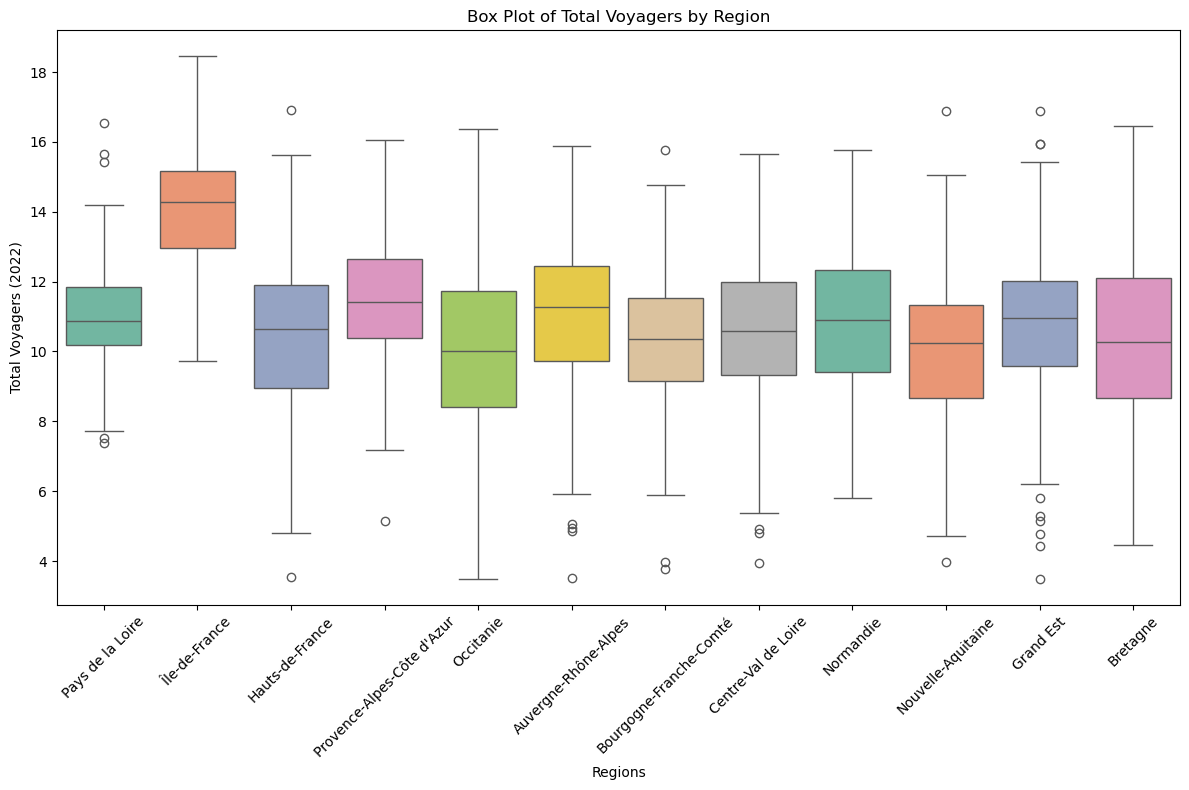

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example: Categorical variable = 'regions', Continuous variable = 'total_voyageurs_2022'

plt.figure(figsize=(12, 8))  # Adjust figure size
sns.boxplot(
    data=df,  
    x="regions"  ,               # Your DataFrame
    hue='regions', 
                  # Categorical variable
    y='total_voyageurs_2022_log',  # Continuous variable
    palette='Set2'   ,
    legend=False          # Optional: Color palette
)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)
plt.title("Box Plot of Total Voyagers by Region")
plt.xlabel("Regions")
plt.ylabel("Total Voyagers (2022)")

plt.tight_layout()
plt.show()


In [24]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Perform Tukey's HSD test
tukey = pairwise_tukeyhsd(
    endog=df['total_voyageurs_2022_log'],  # Continuous variable
    groups=df['regions'],             # Categorical variable
    alpha=0.05                        # Significance level
)
# Convert Tukey summary to DataFrame
tukey_df = pd.DataFrame(data=tukey._results_table.data[1:], columns=tukey._results_table.data[0])

# Filter for rejected hypotheses
rejected_pairs = tukey_df[tukey_df['reject'] == True].reset_index(drop=True)
print(rejected_pairs.shape[0],"significant paires, so oncluding the regions variable can be interesting for OLS ")
rejected_pairs[["group1","group2"]].sample(3)


29 significant paires, so oncluding the regions variable can be interesting for OLS 


,group1,group2
27,Pays de la Loire,Île-de-France
15,Grand Est,Île-de-France
11,Centre-Val de Loire,Île-de-France


In [ ]:
ajouter scatter plot aussi entre les var + quelques statistiques desc pour montrer le besoin de standartisation des variables et ptr outliers management